In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import folium
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import base64#Encodes binary to use alpha numerics
from matplotlib import rc,animation #make visualization more appealing
import folium.plugins
import os
%matplotlib inline


# New Section

**LOAD IMAGES**

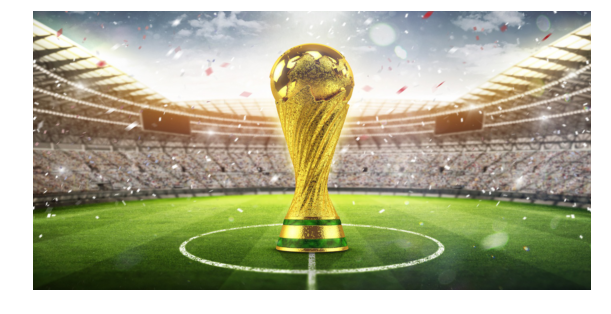

In [0]:
#load image
plt.figure(figsize=(10,10))
img=np.array(Image.open(r"/FIFA-World-Cup-2018-Online-Video.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
#load data
matches=pd.read_csv(r"/WorldCupMatches.csv")
player=pd.read_csv(r"/WorldCupPlayers.csv")
cups=pd.read_csv(r"/WorldCups.csv")


**LOAD SAMPLE DATA**

In [0]:
display("MATCHES DATA")
display(matches.sample(3))
display("PLAYERS DATA")
display(player.sample(3))
display("CUPS DATA")
#display(cups.sample(3))
display(cups.tail(10))

'MATCHES DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
92,1954.0,23 Jun 1954 - 18:00,Group 4,St. Jakob,Basel,Switzerland,4.0,1.0,Italy,,30000.0,1.0,0.0,GRIFFITHS Benjamin (WAL),DA COSTA VIEIRA Jose (POR),LING William (ENG),211.0,1301.0,SUI,ITA
3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'PLAYERS DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
25442,43950100,43950004,GER,VOELLER Rudi (GER),N,12,LEHMANN,NaN,NaN
3224,211,1276,FRA,PIBAROT Pierre (FRA),N,2,Cesar RUMINSKI,NaN,NaN
13559,293,1051,SCO,STEIN Jock (SCO),N,18,Steve ARCHIBALD,NaN,I53' G79'


'CUPS DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


**Total attendance of world cups**

In [0]:
#matches.dtypes
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [0]:
totalgoals=np.array(matches["Home Team Goals"])+np.array(matches["Away Team Goals"])

In [0]:
#check for null values
matches.isnull().sum()
sns.set_style("darkgrid")
#Remove duplicate rows
matches=matches.drop_duplicates(subset="MatchID", keep="first")
#remove null values for year
matches= matches[matches["Year"].notnull()]
att=matches.groupby("Year")["Attendance"].sum().reset_index()
#convert date to integer
att["Year"]=att["Year"].astype(int)


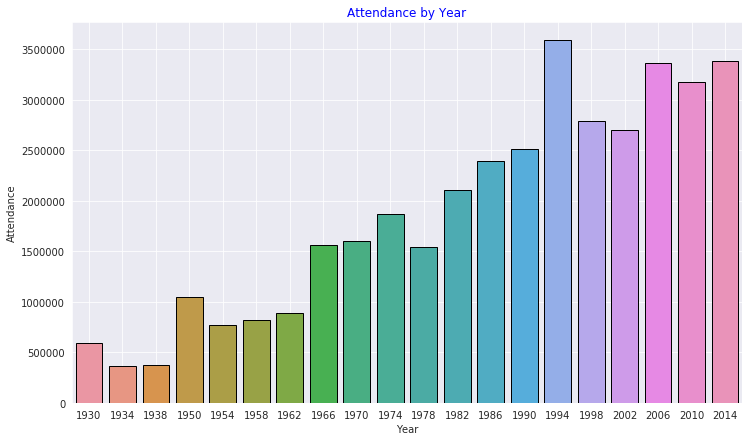

In [0]:
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendance by Year", color="b")
plt.show()

**Average attendance by year**

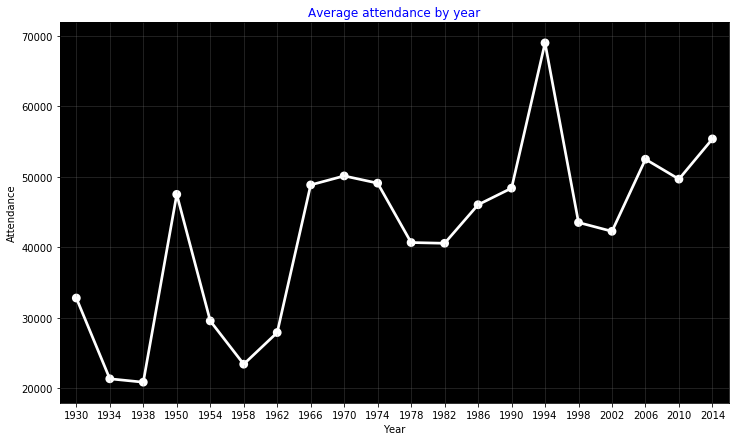

In [0]:
att1=matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"]=att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax=sns.pointplot(att1["Year"],att1["Attendance"],color="w")
#change background color
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendance by year", color="b")
#plt.xticks(rotation=70)
plt.show()

**Total goals scored during games**

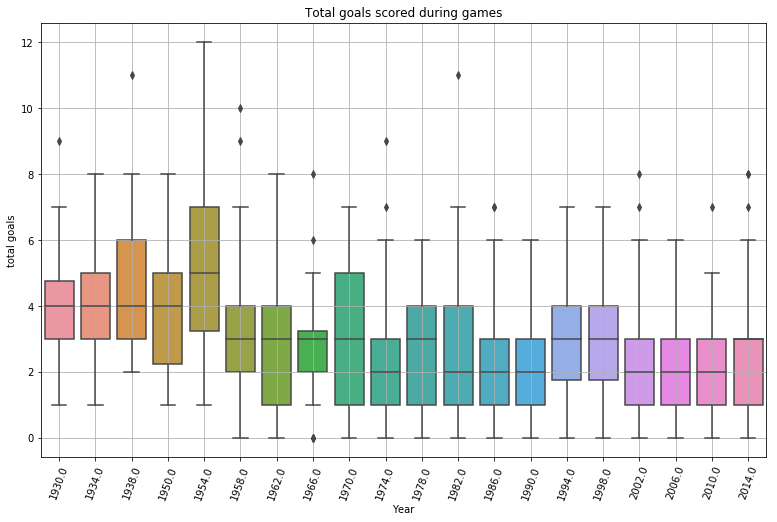

In [0]:
plt.figure(figsize=(13,8))
#sns.boxplot(y=matches["Home Team Goals"],x=matches["Year"])
sns.boxplot(y=totalgoals,x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during games")
plt.xticks(rotation=70)
plt.ylabel("total goals")
plt.show()